In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
kernel = np.exp(-np.linspace(-2,2,20)**2)
kernel = kernel / sum(kernel)

signal = np.hstack([np.zeros((1,30)), np.ones((1,2)), np.zeros((1,20)), np.ones((1,30)), 2*np.ones((1,10)), np.zeros((1,30)), -np.ones((1,10)), np.zeros((1,40))])
signal = np.squeeze(signal)

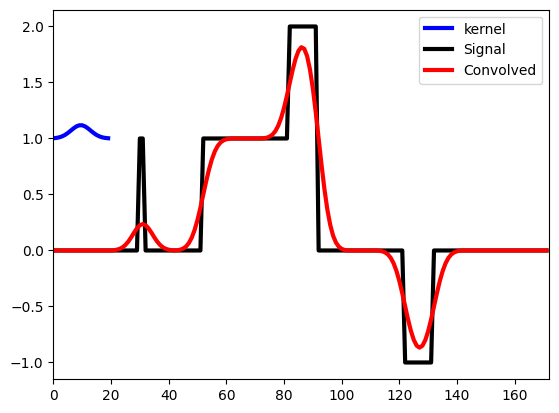

In [3]:
plt.plot(kernel+1, "b", linewidth=3, label="kernel")
plt.plot(signal, "k", linewidth=3, label="Signal")
plt.plot(np.convolve(signal, kernel, "same"), "r", label="Convolved", linewidth=3)
plt.xlim([0, len(signal)])
plt.legend()
plt.show()

In [4]:
ndata = len(signal)
nkern = len(kernel)
nConv = ndata+nkern-1
halfK = nkern//2

dataX = scipy.fft.fft(signal, nConv)
kernX = scipy.fft.fft(kernel, nConv)

convresX = dataX * kernX

convres = scipy.fft.ifft(convresX)
convres = convres[halfK-1:-halfK+1]

c:\Users\kerem\anaconda3\envs\forlearning\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\kerem\anaconda3\envs\forlearning\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


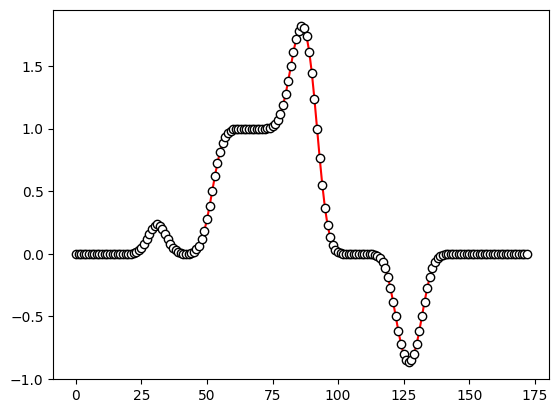

In [5]:
plt.plot(np.convolve(signal, kernel, "same"), "r")
plt.plot(convres, "ko", markerfacecolor="w")
plt.show()